In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Set dtypes before reading in csv
income_dtypes = {"GeoFips": str}

In [3]:
# Import income data
income_original_df = pd.read_csv("Resources/income_original_df.csv", dtype=income_dtypes)
income_original_df

,Unnamed: 0,GeoFips,per_capita_income
0,0,01001,46814
1,1,01003,50953
2,2,01005,37850
3,3,01007,34300
4,4,01009,38808
...,...,...,...
3135,3135,56037,54000
3136,3136,56039,220645
3137,3137,56041,42854
3138,3138,56043,54361


In [4]:
# Drop Unnamed column
income_original_df.drop(columns=["Unnamed: 0"], inplace=True)
income_original_df

,GeoFips,per_capita_income
0,01001,46814
1,01003,50953
2,01005,37850
3,01007,34300
4,01009,38808
...,...,...
3135,56037,54000
3136,56039,220645
3137,56041,42854
3138,56043,54361


In [5]:
# Check dtypes
income_original_df.dtypes

GeoFips              object
per_capita_income    object
dtype: object

In [7]:
# Set dtypes before reading in csv
physicians_dtypes = {"GeoFips": str}

In [8]:
# Import physician data
physicians_merge_df = pd.read_csv("Resources/physicians_merge_df.csv", dtype=physicians_dtypes)
physicians_merge_df

,Unnamed: 0,st,GeoFips,county_name,pcp_count
0,0,FL,12086,Miami-Dade,13619
1,12,PR,72027,Camuy,20
2,32,CA,06025,Imperial,236
3,101,OK,40109,Oklahoma,2914
4,108,OH,39115,Morgan,19
...,...,...,...,...,...
3152,978090,CA,06051,Mono,30
3153,978127,TX,48169,Garza,2
3154,978219,NM,35021,Harding,1
3155,978335,MO,29133,Mississippi,14


In [9]:
# Drop Unnamed column
physicians_merge_df.drop(columns=["Unnamed: 0"], inplace=True)
physicians_merge_df

,st,GeoFips,county_name,pcp_count
0,FL,12086,Miami-Dade,13619
1,PR,72027,Camuy,20
2,CA,06025,Imperial,236
3,OK,40109,Oklahoma,2914
4,OH,39115,Morgan,19
...,...,...,...,...
3152,CA,06051,Mono,30
3153,TX,48169,Garza,2
3154,NM,35021,Harding,1
3155,MO,29133,Mississippi,14


In [10]:
# Check dtypes
physicians_merge_df.dtypes

st             object
GeoFips        object
county_name    object
pcp_count       int64
dtype: object

In [11]:
# Set dtypes before reading in csv
population_dtypes = {"GeoFips": str}

In [12]:
# Import population data
population_original_df = pd.read_csv("Resources/population_original_df.csv", dtype=population_dtypes)
population_original_df

,Unnamed: 0,GeoFips,population,pop_density
0,0,01001,55200,35.853419
1,1,01003,208107,50.541504
2,2,01005,25782,11.247981
3,3,01007,22527,13.973114
4,4,01009,57645,34.515816
...,...,...,...,...
3215,3215,72145,53371,449.335380
3216,3216,72147,8771,66.678630
3217,3217,72149,22993,249.115455
3218,3218,72151,34149,238.795547


In [13]:
# Drop Unnamed column
population_original_df.drop(columns=["Unnamed: 0"], inplace=True)
population_original_df

,GeoFips,population,pop_density
0,01001,55200,35.853419
1,01003,208107,50.541504
2,01005,25782,11.247981
3,01007,22527,13.973114
4,01009,57645,34.515816
...,...,...,...
3215,72145,53371,449.335380
3216,72147,8771,66.678630
3217,72149,22993,249.115455
3218,72151,34149,238.795547


In [14]:
# Check dtypes
population_original_df.dtypes

GeoFips         object
population       int64
pop_density    float64
dtype: object

### Merge all data

In [15]:
# Merge physician data to income data
phys_income_merged_df = physicians_merge_df.merge(income_original_df, left_on="GeoFips", right_on="GeoFips")
phys_income_merged_df

,st,GeoFips,county_name,pcp_count,per_capita_income
0,FL,12086,Miami-Dade,13619,57213
1,CA,06025,Imperial,236,44500
2,OK,40109,Oklahoma,2914,56971
3,OH,39115,Morgan,19,38583
4,CO,08059,Jefferson,1459,68829
...,...,...,...,...,...
3025,CA,06051,Mono,30,54586
3026,TX,48169,Garza,2,31223
3027,NM,35021,Harding,1,50723
3028,MO,29133,Mississippi,14,37483


In [16]:
# Merge physician / income data to population data
merged_initial_df = phys_income_merged_df.merge(population_original_df, left_on="GeoFips", right_on="GeoFips")
merged_initial_df

,st,GeoFips,county_name,pcp_count,per_capita_income,population,pop_density
0,FL,12086,Miami-Dade,13619,57213,2715516,552.187071
1,CA,06025,Imperial,236,44500,180216,16.659991
2,OK,40109,Oklahoma,2914,56971,782051,425.989528
3,OH,39115,Morgan,19,38583,14702,13.631412
4,CO,08059,Jefferson,1459,68829,570427,288.167016
...,...,...,...,...,...,...,...
3025,CA,06051,Mono,30,54586,14174,1.794896
3026,TX,48169,Garza,2,31223,6288,2.717454
3027,NM,35021,Harding,1,50723,459,0.083379
3028,MO,29133,Mississippi,14,37483,13748,12.896866


In [17]:
# Check dtypes
merged_initial_df.dtypes

st                    object
GeoFips               object
county_name           object
pcp_count              int64
per_capita_income     object
population             int64
pop_density          float64
dtype: object

In [19]:
# Re order columns
merged_initial_df = merged_initial_df[["GeoFips", "county_name", "st", "pcp_count", "population", "pop_density", "per_capita_income"]]
merged_initial_df

,GeoFips,county_name,st,pcp_count,population,pop_density,per_capita_income
0,12086,Miami-Dade,FL,13619,2715516,552.187071,57213
1,06025,Imperial,CA,236,180216,16.659991,44500
2,40109,Oklahoma,OK,2914,782051,425.989528,56971
3,39115,Morgan,OH,19,14702,13.631412,38583
4,08059,Jefferson,CO,1459,570427,288.167016,68829
...,...,...,...,...,...,...,...
3025,06051,Mono,CA,30,14174,1.794896,54586
3026,48169,Garza,TX,2,6288,2.717454,31223
3027,35021,Harding,NM,1,459,0.083379,50723
3028,29133,Mississippi,MO,14,13748,12.896866,37483


In [20]:
# Check for populations with "(NA)"
merged_initial_df.sort_values(["population"], ascending=True)

,GeoFips,county_name,st,pcp_count,population,pop_density,per_capita_income
3027,35021,Harding,NM,1,459,0.083379,50723
2813,02282,Yakutat,AK,5,689,0.034896,66119
2957,31091,Hooker,NE,2,691,0.369955,54516
3022,31075,Grant,NE,1,718,0.356844,54922
2673,46075,Jones,SD,20,735,0.292661,59264
...,...,...,...,...,...,...,...
25,48201,Harris,TX,12445,4602523,1042.130651,60183
74,17031,Cook,IL,16124,5223719,2134.420727,69935
10,06037,Los Angeles,FL,18526,10098052,960.742778,68272
9,06037,Los Angeles,CA,18526,10098052,960.742778,68272


In [21]:
# Drop population values equal to "(NA)" 
merged_initial_df.drop(merged_initial_df.index[merged_initial_df['population'] == "(NA)"], inplace = True)
merged_initial_df

,GeoFips,county_name,st,pcp_count,population,pop_density,per_capita_income
0,12086,Miami-Dade,FL,13619,2715516,552.187071,57213
1,06025,Imperial,CA,236,180216,16.659991,44500
2,40109,Oklahoma,OK,2914,782051,425.989528,56971
3,39115,Morgan,OH,19,14702,13.631412,38583
4,08059,Jefferson,CO,1459,570427,288.167016,68829
...,...,...,...,...,...,...,...
3025,06051,Mono,CA,30,14174,1.794896,54586
3026,48169,Garza,TX,2,6288,2.717454,31223
3027,35021,Harding,NM,1,459,0.083379,50723
3028,29133,Mississippi,MO,14,13748,12.896866,37483


In [22]:
# Check for per_capita_income with "(NA)"
merged_initial_df.sort_values(["per_capita_income"], ascending=True)

,GeoFips,county_name,st,pcp_count,population,pop_density,per_capita_income
1697,02261,Valdez-Cordova,AK,29,9301,0.104937,(NA)
2675,46119,Sully,SD,2,1331,0.510470,100301
873,51013,Arlington,VA,361,231803,3442.635855,100823
326,34027,Morris,NJ,1571,494383,414.453485,102227
230,12021,Collier,FL,1164,363922,70.385228,103865
...,...,...,...,...,...,...,...
750,34019,Hunterdon,NJ,305,125051,112.855259,95088
269,13121,Fulton,GA,4128,1021902,749.058522,95683
31,36059,Nassau,NY,9091,1356564,1840.443984,96253
153,53033,King,WA,7559,2163257,394.855733,96647


In [23]:
# Drop per_capita_income values equal to "(NA)" 
merged_initial_df.drop(merged_initial_df.index[merged_initial_df['per_capita_income'] == "(NA)"], inplace = True)
merged_initial_df

,GeoFips,county_name,st,pcp_count,population,pop_density,per_capita_income
0,12086,Miami-Dade,FL,13619,2715516,552.187071,57213
1,06025,Imperial,CA,236,180216,16.659991,44500
2,40109,Oklahoma,OK,2914,782051,425.989528,56971
3,39115,Morgan,OH,19,14702,13.631412,38583
4,08059,Jefferson,CO,1459,570427,288.167016,68829
...,...,...,...,...,...,...,...
3025,06051,Mono,CA,30,14174,1.794896,54586
3026,48169,Garza,TX,2,6288,2.717454,31223
3027,35021,Harding,NM,1,459,0.083379,50723
3028,29133,Mississippi,MO,14,13748,12.896866,37483


In [24]:
# Check dtypes
merged_initial_df.dtypes

GeoFips               object
county_name           object
st                    object
pcp_count              int64
population             int64
pop_density          float64
per_capita_income     object
dtype: object

In [25]:
# Change per_capita_income to numeric
merged_initial_df["per_capita_income"] = pd.to_numeric(merged_initial_df["per_capita_income"])
merged_initial_df.dtypes

GeoFips               object
county_name           object
st                    object
pcp_count              int64
population             int64
pop_density          float64
per_capita_income      int64
dtype: object

In [26]:
# Add column calculating number of doctors divided by population
merged_initial_df["pcp_per_capita"] = merged_initial_df["pcp_count"]/merged_initial_df["population"]*1000
merged_initial_df

,GeoFips,county_name,st,pcp_count,population,pop_density,per_capita_income,pcp_per_capita
0,12086,Miami-Dade,FL,13619,2715516,552.187071,57213,5.015253
1,06025,Imperial,CA,236,180216,16.659991,44500,1.309540
2,40109,Oklahoma,OK,2914,782051,425.989528,56971,3.726100
3,39115,Morgan,OH,19,14702,13.631412,38583,1.292341
4,08059,Jefferson,CO,1459,570427,288.167016,68829,2.557733
...,...,...,...,...,...,...,...,...
3025,06051,Mono,CA,30,14174,1.794896,54586,2.116551
3026,48169,Garza,TX,2,6288,2.717454,31223,0.318066
3027,35021,Harding,NM,1,459,0.083379,50723,2.178649
3028,29133,Mississippi,MO,14,13748,12.896866,37483,1.018330


In [28]:
# Rename columns
merged_initial_df.rename({'county_name': 'county', 'st': 'state'}, axis=1, inplace=True)

In [29]:
# Check dtypes
merged_initial_df.dtypes

GeoFips               object
county                object
state                 object
pcp_count              int64
population             int64
pop_density          float64
per_capita_income      int64
pcp_per_capita       float64
dtype: object

In [30]:
# Create series of density data
density_s = merged_initial_df.pop_density
density_s

0       552.187071
1        16.659991
2       425.989528
3        13.631412
4       288.167016
           ...    
3025      1.794896
3026      2.717454
3027      0.083379
3028     12.896866
3029      5.410380
Name: pop_density, Length: 3029, dtype: float64

In [31]:
# Get the descriptive statistics for density
merged_initial_df.pop_density.describe()

count     3029.000000
mean       102.016521
std        703.920216
min          0.014362
25%          7.077235
50%         17.732294
75%         45.403208
max      27819.804801
Name: pop_density, dtype: float64

In [32]:
# Cut the density into the ranges.
density_bins = [0, 7.1, 17.8, 45.5, 27900]
pd.cut(density_s, density_bins)

0       (45.5, 27900.0]
1           (7.1, 17.8]
2       (45.5, 27900.0]
3           (7.1, 17.8]
4       (45.5, 27900.0]
             ...       
3025         (0.0, 7.1]
3026         (0.0, 7.1]
3027         (0.0, 7.1]
3028        (7.1, 17.8]
3029         (0.0, 7.1]
Name: pop_density, Length: 3029, dtype: category
Categories (4, interval[float64, right]): [(0.0, 7.1] < (7.1, 17.8] < (17.8, 45.5] < (45.5, 27900.0]]

In [33]:
# Check the distribution of bins
density_s.groupby(pd.cut(density_s, density_bins)).count()

pop_density
(0.0, 7.1]         760
(7.1, 17.8]        759
(17.8, 45.5]       755
(45.5, 27900.0]    755
Name: pop_density, dtype: int64

In [34]:
# Establish the bins
merged_initial_df["pop_density_lvl"] = pd.cut(density_s, density_bins, labels=False)
merged_initial_df

,GeoFips,county,state,pcp_count,population,pop_density,per_capita_income,pcp_per_capita,pop_density_lvl
0,12086,Miami-Dade,FL,13619,2715516,552.187071,57213,5.015253,3
1,06025,Imperial,CA,236,180216,16.659991,44500,1.309540,1
2,40109,Oklahoma,OK,2914,782051,425.989528,56971,3.726100,3
3,39115,Morgan,OH,19,14702,13.631412,38583,1.292341,1
4,08059,Jefferson,CO,1459,570427,288.167016,68829,2.557733,3
...,...,...,...,...,...,...,...,...,...
3025,06051,Mono,CA,30,14174,1.794896,54586,2.116551,0
3026,48169,Garza,TX,2,6288,2.717454,31223,0.318066,0
3027,35021,Harding,NM,1,459,0.083379,50723,2.178649,0
3028,29133,Mississippi,MO,14,13748,12.896866,37483,1.018330,1


In [35]:
merged_initial_df.dtypes

GeoFips               object
county                object
state                 object
pcp_count              int64
population             int64
pop_density          float64
per_capita_income      int64
pcp_per_capita       float64
pop_density_lvl        int64
dtype: object

In [36]:
# Create function to apply parameters for "region" (as defined by bea)

def region_name(s):
    if (s['state'] == "NH") or (s['state'] == "ME") or (s['state'] == "VT") or (s['state'] == "MA") or (s['state'] == "CT") or (s['state'] == "RI"):
        return "new_england"
    elif (s['state'] == "NY") or (s['state'] == "PA") or (s['state'] == "NJ") or (s['state'] == "DE") or (s['state'] == "DC") or (s['state'] == "MD"):
        return "mideast"
    elif (s['state'] == "WI") or (s['state'] == "MI") or (s['state'] == "IL") or (s['state'] == "IN") or (s['state'] == "OH"):
        return "great_lakes"
    elif (s['state'] == "ND") or (s['state'] == "SD") or (s['state'] == "NE") or (s['state'] == "KS") or (s['state'] == "MN") or (s['state'] == "IA") or (s['state'] == "MO"):
        return "plains"
    elif (s['state'] == "WV") or (s['state'] == "VA") or (s['state'] == "KY") or (s['state'] == "TN") or (s['state'] == "NC") or (s['state'] == "AR") or (s['state'] == "LA") or (s['state'] == "MS") or (s['state'] == "AL") or (s['state'] == "GA") or (s['state'] == "SC") or (s['state'] == "FL"):
        return "southeast"
    elif (s['state'] == "AZ") or (s['state'] == "NM") or (s['state'] == "OK") or (s['state'] == "TX"):
        return "southwest"
    elif (s['state'] == "WA") or (s['state'] == "OR") or (s['state'] == "NV") or (s['state'] == "CA") or (s['state'] == "HI") or (s['state'] == "AK"):
        return "far_west"
    else:
        return "rocky_mountain"

In [37]:
# Apply function to add regions
merged_initial_df['region'] = merged_initial_df.apply(region_name, axis=1)
merged_initial_df

,GeoFips,county,state,pcp_count,population,pop_density,per_capita_income,pcp_per_capita,pop_density_lvl,region
0,12086,Miami-Dade,FL,13619,2715516,552.187071,57213,5.015253,3,southeast
1,06025,Imperial,CA,236,180216,16.659991,44500,1.309540,1,far_west
2,40109,Oklahoma,OK,2914,782051,425.989528,56971,3.726100,3,southwest
3,39115,Morgan,OH,19,14702,13.631412,38583,1.292341,1,great_lakes
4,08059,Jefferson,CO,1459,570427,288.167016,68829,2.557733,3,rocky_mountain
...,...,...,...,...,...,...,...,...,...,...
3025,06051,Mono,CA,30,14174,1.794896,54586,2.116551,0,far_west
3026,48169,Garza,TX,2,6288,2.717454,31223,0.318066,0,southwest
3027,35021,Harding,NM,1,459,0.083379,50723,2.178649,0,southwest
3028,29133,Mississippi,MO,14,13748,12.896866,37483,1.018330,1,plains


In [38]:
# Check dtypes
merged_initial_df.dtypes

GeoFips               object
county                object
state                 object
pcp_count              int64
population             int64
pop_density          float64
per_capita_income      int64
pcp_per_capita       float64
pop_density_lvl        int64
region                object
dtype: object

In [39]:
# Create individual region columns
region_df = pd.get_dummies(merged_initial_df, columns=["region"])
region_df

,GeoFips,county,state,pcp_count,population,pop_density,per_capita_income,pcp_per_capita,pop_density_lvl,region_far_west,region_great_lakes,region_mideast,region_new_england,region_plains,region_rocky_mountain,region_southeast,region_southwest
0,12086,Miami-Dade,FL,13619,2715516,552.187071,57213,5.015253,3,0,0,0,0,0,0,1,0
1,06025,Imperial,CA,236,180216,16.659991,44500,1.309540,1,1,0,0,0,0,0,0,0
2,40109,Oklahoma,OK,2914,782051,425.989528,56971,3.726100,3,0,0,0,0,0,0,0,1
3,39115,Morgan,OH,19,14702,13.631412,38583,1.292341,1,0,1,0,0,0,0,0,0
4,08059,Jefferson,CO,1459,570427,288.167016,68829,2.557733,3,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3025,06051,Mono,CA,30,14174,1.794896,54586,2.116551,0,1,0,0,0,0,0,0,0
3026,48169,Garza,TX,2,6288,2.717454,31223,0.318066,0,0,0,0,0,0,0,0,1
3027,35021,Harding,NM,1,459,0.083379,50723,2.178649,0,0,0,0,0,0,0,0,1
3028,29133,Mississippi,MO,14,13748,12.896866,37483,1.018330,1,0,0,0,0,1,0,0,0


In [40]:
# Create individual state columns
merged_df = pd.get_dummies(region_df, columns=["state"])
merged_df

,GeoFips,county,pcp_count,population,pop_density,per_capita_income,pcp_per_capita,pop_density_lvl,region_far_west,region_great_lakes,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,12086,Miami-Dade,13619,2715516,552.187071,57213,5.015253,3,0,0,...,0,0,0,0,0,0,0,0,0,0
1,06025,Imperial,236,180216,16.659991,44500,1.309540,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,40109,Oklahoma,2914,782051,425.989528,56971,3.726100,3,0,0,...,0,0,0,0,0,0,0,0,0,0
3,39115,Morgan,19,14702,13.631412,38583,1.292341,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,08059,Jefferson,1459,570427,288.167016,68829,2.557733,3,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3025,06051,Mono,30,14174,1.794896,54586,2.116551,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3026,48169,Garza,2,6288,2.717454,31223,0.318066,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3027,35021,Harding,1,459,0.083379,50723,2.178649,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3028,29133,Mississippi,14,13748,12.896866,37483,1.018330,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# Review calculated info in new pcp_per_capita column
merged_df.pcp_per_capita.describe()

count    3029.000000
mean        2.550960
std         2.063406
min         0.025139
25%         1.392669
50%         2.165234
75%         3.238274
max        37.618786
Name: pcp_per_capita, dtype: float64

In [42]:
# Create series of pcp_per_capita data
pcp_per_capita_s = merged_df.pcp_per_capita
pcp_per_capita_s

0       5.015253
1       1.309540
2       3.726100
3       1.292341
4       2.557733
          ...   
3025    2.116551
3026    0.318066
3027    2.178649
3028    1.018330
3029    0.166889
Name: pcp_per_capita, Length: 3029, dtype: float64

In [43]:
# Cut the pcp_per_capita into the ranges.
pcp_per_capita_bins = [0, 2.17, 38]
pd.cut(pcp_per_capita_s, pcp_per_capita_bins)

0       (2.17, 38.0]
1        (0.0, 2.17]
2       (2.17, 38.0]
3        (0.0, 2.17]
4       (2.17, 38.0]
            ...     
3025     (0.0, 2.17]
3026     (0.0, 2.17]
3027    (2.17, 38.0]
3028     (0.0, 2.17]
3029     (0.0, 2.17]
Name: pcp_per_capita, Length: 3029, dtype: category
Categories (2, interval[float64, right]): [(0.0, 2.17] < (2.17, 38.0]]

In [44]:
# Check the distribution of bins
pcp_per_capita_s.groupby(pd.cut(pcp_per_capita_s, pcp_per_capita_bins)).count()

pcp_per_capita
(0.0, 2.17]     1519
(2.17, 38.0]    1510
Name: pcp_per_capita, dtype: int64

In [45]:
# Establish the bins
merged_df["pcp_per_capita_bins"] = pd.cut(pcp_per_capita_s, pcp_per_capita_bins, labels=False)
merged_df

,GeoFips,county,pcp_count,population,pop_density,per_capita_income,pcp_per_capita,pop_density_lvl,region_far_west,region_great_lakes,...,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,pcp_per_capita_bins
0,12086,Miami-Dade,13619,2715516,552.187071,57213,5.015253,3,0,0,...,0,0,0,0,0,0,0,0,0,1
1,06025,Imperial,236,180216,16.659991,44500,1.309540,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,40109,Oklahoma,2914,782051,425.989528,56971,3.726100,3,0,0,...,0,0,0,0,0,0,0,0,0,1
3,39115,Morgan,19,14702,13.631412,38583,1.292341,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,08059,Jefferson,1459,570427,288.167016,68829,2.557733,3,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3025,06051,Mono,30,14174,1.794896,54586,2.116551,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3026,48169,Garza,2,6288,2.717454,31223,0.318066,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3027,35021,Harding,1,459,0.083379,50723,2.178649,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3028,29133,Mississippi,14,13748,12.896866,37483,1.018330,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# Check dtypes
merged_df.dtypes

GeoFips                 object
county                  object
pcp_count                int64
population               int64
pop_density            float64
                        ...   
state_WA                 uint8
state_WI                 uint8
state_WV                 uint8
state_WY                 uint8
pcp_per_capita_bins      int64
Length: 68, dtype: object

In [47]:
# # Format columns
# merged_df["population"] = merged_df["population"].map("{:,}".format)
# merged_df["per_capita_income"] = merged_df["per_capita_income"].map("${:,.0f}".format)
# merged_df

In [48]:
# Saving file as reference
merged_df.to_csv("Resources/merged_df.csv")

### Graph data

In [49]:
# Print out pcp_per_capita
pcp_per_capita = merged_df.pcp_per_capita
pcp_per_capita

0       5.015253
1       1.309540
2       3.726100
3       1.292341
4       2.557733
          ...   
3025    2.116551
3026    0.318066
3027    2.178649
3028    1.018330
3029    0.166889
Name: pcp_per_capita, Length: 3029, dtype: float64

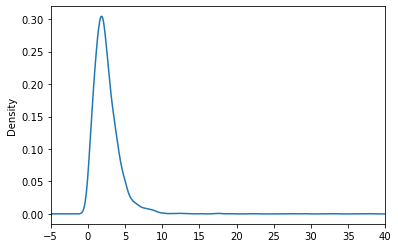

In [51]:
# Visualize pcp_per_capita
pcp_per_capita.plot.density()
plt.xlim(-5,40)
plt.show()

### To do ...
### Add demographics?
### Add onehotencoder for pcp_per_capita (binary)? DONE
### Make sure to choose one version for machine learning (pop_density OR density group)
### Add onehotencoder for states also? DONE

### Starting point - pcp_per_capita as bins with other options, then consider pcp_per_capita values as potential secondary option 